In [23]:
import pandas as pd # 引用套件並縮寫為 pd  
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.set_option('display.width',1000)
df = pd.read_csv('/Users/xwlee/Desktop/ECt/hw7/Churn_Modelling.csv') 
df.isnull().sum(axis=0)

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [24]:
df['EstimatedSalary']=df['EstimatedSalary'].replace(np.nan,df['EstimatedSalary'].mean())
df['Age']=df['Age'].replace(np.nan,df['Age'].mode()[0])
df['Gender']=df['Gender'].replace(np.nan,df['Gender'].mode()[0])
df.isnull().sum(axis=0)

CustomerId         0
CredRate           0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    0
Exited             0
dtype: int64

In [25]:
df['CreditScore']=df['CredRate']
df = df.drop(['CredRate'],axis=1)

df['IsActiveMember']=df['ActMem']
df = df.drop(['ActMem'],axis=1)

df['NumOfProducts']=df['Prod Number']
df = df.drop(['Prod Number'],axis=1)

df['Churn']=df['Exited']
df = df.drop(['Exited'],axis=1)

df

,CustomerId,Geography,Gender,Age,Tenure,Balance,HasCrCard,EstimatedSalary,CreditScore,IsActiveMember,NumOfProducts,Churn
0,15634602,France,Female,42.0,2,0.00,1,101348.88,619,1,1,1
1,15647311,Spain,Female,41.0,1,83807.86,0,112542.58,608,1,1,0
2,15619304,France,Female,42.0,8,159660.80,1,113931.57,502,0,3,1
3,15701354,France,Female,39.0,1,0.00,0,93826.63,699,0,2,0
4,15737888,Spain,Female,43.0,2,125510.82,1,79084.10,850,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,France,Male,39.0,5,0.00,1,96270.64,771,0,2,0
9996,15569892,France,Male,35.0,10,57369.61,1,101699.77,516,1,1,0
9997,15584532,France,Female,36.0,7,0.00,0,42085.58,709,1,1,1
9998,15682355,Germany,Male,42.0,3,75075.31,1,92888.52,772,0,2,1


In [26]:
df = df.drop(['CustomerId'],axis=1)
df['Geography']=df['Geography'].astype("category")
df['Gender']=df['Gender'].astype("category")
df['HasCrCard']=df['HasCrCard'].astype("category")
df['Churn']=df['Churn'].astype("category")
df['IsActiveMember']=df['IsActiveMember'].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Geography        10000 non-null  category
 1   Gender           10000 non-null  category
 2   Age              10000 non-null  float64 
 3   Tenure           10000 non-null  int64   
 4   Balance          10000 non-null  float64 
 5   HasCrCard        10000 non-null  category
 6   EstimatedSalary  10000 non-null  float64 
 7   CreditScore      10000 non-null  int64   
 8   IsActiveMember   10000 non-null  category
 9   NumOfProducts    10000 non-null  int64   
 10  Churn            10000 non-null  category
dtypes: category(5), float64(3), int64(3)
memory usage: 518.2 KB


In [27]:
df.to_csv('Result.csv' , index=False)

In [28]:
HasCrCard_ratio=df.groupby('HasCrCard').size()[1]/df.groupby('HasCrCard').size().sum()
NoCrCard_ratio=df.groupby('HasCrCard').size()[0]/df.groupby('HasCrCard').size().sum()
print("有",HasCrCard_ratio,"持有信用卡")
print("有",NoCrCard_ratio,"不持有信用卡")

有 0.7055 持有信用卡
有 0.2945 不持有信用卡


In [29]:
Chun_ratio=df.groupby('Churn').size()[1]/df.groupby('Churn').size().sum()
print("有",Chun_ratio,"的客戶流失")

有 0.2037 的客戶流失


In [30]:
IsActiveMember_ratio=df.groupby('IsActiveMember').size()[1]/df.groupby('IsActiveMember').size().sum()
print("有",IsActiveMember_ratio,"的客戶仍是活躍狀態")

有 0.5151 的客戶仍是活躍狀態


In [31]:
df.groupby(['Churn']).agg({'Age': ['mean'], 'Tenure': ['mean'], 'Balance': ['mean'], 'EstimatedSalary': ['mean'], 'CreditScore': ['mean'], 'NumOfProducts': ['mean']})

,Age,Tenure,Balance,EstimatedSalary,CreditScore,NumOfProducts
,mean,mean,mean,mean,mean,mean
Churn,,,,,,
0,37.411277,5.033279,72745.296779,99718.932023,651.853196,1.544267
1,44.837997,4.932744,91108.539337,101465.677531,645.351497,1.475209


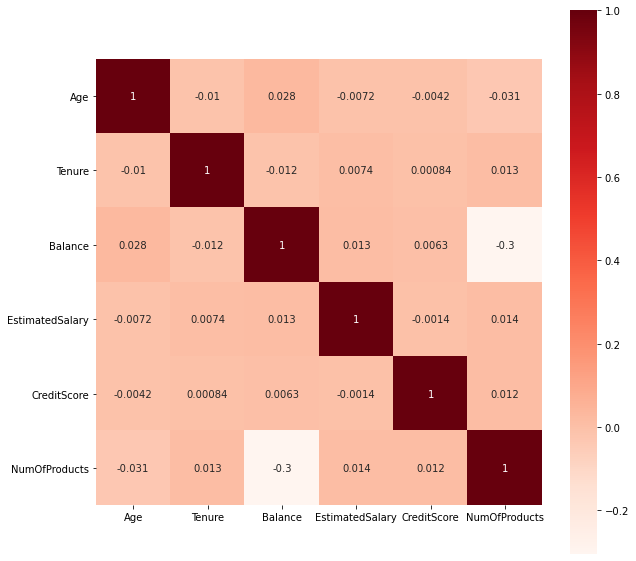

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
corr =df.corr() #計算相關係數
plt.subplots(figsize=(10, 10))  # 設置長寬尺寸大小
sns.heatmap(corr, annot=True, vmax=1, square=True, cmap="Reds")
#1.丟入的資料 2.是否輸出熱力圖數值大小 3.最大值顯示4.變成正方形5.要什麼顏色
plt.show()

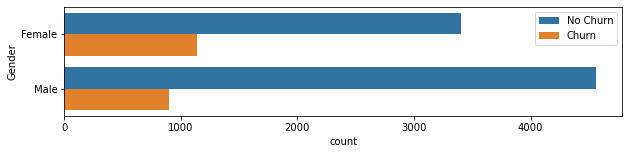

In [33]:
plt.subplots(figsize=(10, 2))  # 設置長寬尺寸大小
sns.countplot(y='Gender',hue='Churn',data=df,orient="h")
plt.legend(labels=["No Churn","Churn"])
plt.show()

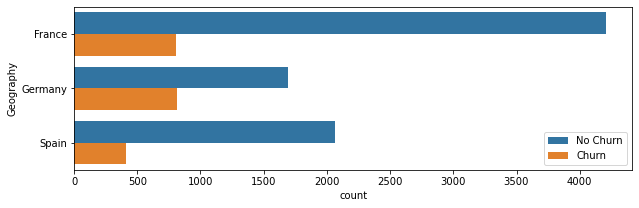

In [34]:
plt.subplots(figsize=(10, 3))  # 設置長寬尺寸大小
sns.countplot(y='Geography',hue='Churn',data=df,orient="h")
plt.legend(labels=["No Churn","Churn"])
plt.show()

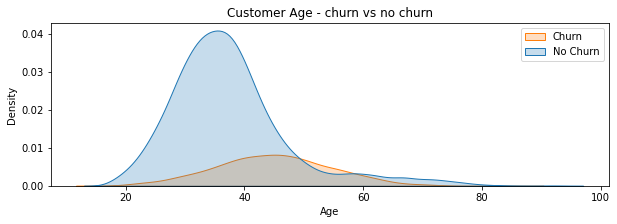

In [35]:
plt.subplots(figsize=(10, 3))
sns.kdeplot(x='Age',hue='Churn',data=df,shade=True)
plt.legend(labels=["Churn","No Churn"])
plt.title("Customer Age - churn vs no churn")
plt.show()

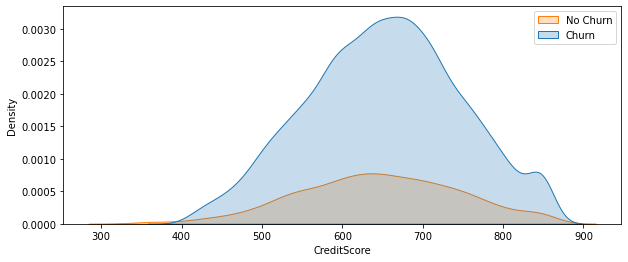

In [36]:
plt.subplots(figsize=(10, 4))
sns.kdeplot(x='CreditScore',hue='Churn',data=df,shade=True)
plt.legend(labels=["No Churn","Churn"])
plt.show()